<a href="https://colab.research.google.com/github/kdemertzis/TS_demer/blob/main/Fed_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

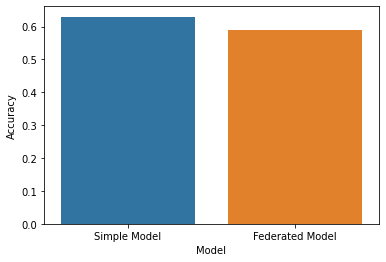

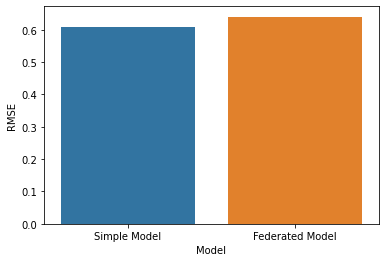

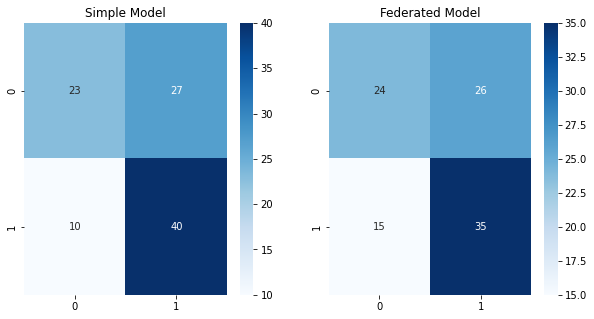

In [34]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Generate some random training data for each client
np.random.seed(0)

client_1_data = make_classification(n_samples=100, n_features=20, random_state=0)
client_2_data = make_classification(n_samples=100, n_features=20, random_state=1)
client_3_data = make_classification(n_samples=100, n_features=20, random_state=2)

# Train a Random Forest Classifier model on each client's data
client_1_model = RandomForestClassifier().fit(client_1_data[0], client_1_data[1])
client_2_model = RandomForestClassifier().fit(client_2_data[0], client_2_data[1])
client_3_model = RandomForestClassifier().fit(client_3_data[0], client_3_data[1])

# Serialize the models using Pickle
with open('client_1_model.pkl', 'wb') as f:
    pickle.dump(client_1_model, f)
    
with open('client_2_model.pkl', 'wb') as f:
    pickle.dump(client_2_model, f)
    
with open('client_3_model.pkl', 'wb') as f:
    pickle.dump(client_3_model, f)
    
# Load the models from disk
with open('client_1_model.pkl', 'rb') as f:
    client_1_model = pickle.load(f)
    
with open('client_2_model.pkl', 'rb') as f:
    client_2_model = pickle.load(f)
    
with open('client_3_model.pkl', 'rb') as f:
    client_3_model = pickle.load(f)

# Combine the models by taking the average of their predictions
predictions = []

for model in [client_1_model, client_2_model, client_3_model]:
    predictions.append(model.predict_proba(test_features))
    
aggregated_predictions = np.mean(predictions, axis=0)

# Train a new model using the aggregated predictions
aggregated_model = RandomForestClassifier()
aggregated_model.fit(test_features, np.argmax(aggregated_predictions, axis=1))

# Generate some test data to evaluate the accuracy of the models
test_data = make_classification(n_samples=100, n_features=20, random_state=3)
test_features = test_data[0]
test_labels = test_data[1]

# Predict the test data using both models
simple_model_predictions = client_1_model.predict(test_features)
federated_model_predictions = aggregated_model.predict(test_features)

# Calculate the accuracy of both models
simple_model_accuracy = accuracy_score(test_labels, simple_model_predictions)
federated_model_accuracy = accuracy_score(test_labels, federated_model_predictions)

# Calculate the RMSE of both models
simple_model_rmse = np.sqrt(mean_squared_error(test_labels, simple_model_predictions))
federated_model_rmse = np.sqrt(mean_squared_error(test_labels, federated_model_predictions))

# Plot the accuracy of both models
fig, ax = plt.subplots()
index = ['Simple Model', 'Federated Model']
accuracies = [simple_model_accuracy, federated_model_accuracy]
bar_plot = sns.barplot(x=index, y=accuracies)
bar_plot.set_ylabel('Accuracy')
bar_plot.set_xlabel('Model')

# Plot the RMSE of both models
fig, ax = plt.subplots()
index = ['Simple Model', 'Federated Model']
rmses = [simple_model_rmse, federated_model_rmse]
bar_plot = sns.barplot(x=index, y=rmses)
bar_plot.set_ylabel('RMSE')
bar_plot.set_xlabel('Model')

# Plot the confusion matrix of both models
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(test_labels, simple_model_predictions), annot=True, ax=ax[0], cmap='Blues')
ax[0].set_title('Simple Model')
sns.heatmap(confusion_matrix(test_labels, federated_model_predictions), annot=True, ax=ax[1], cmap='Blues')
ax[1].set_title('Federated Model')

plt.show()


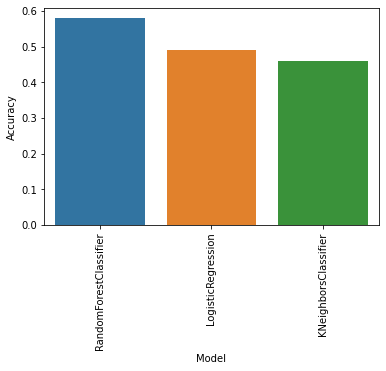

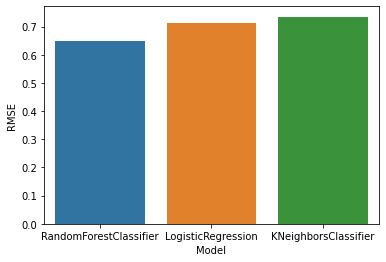

In [36]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, auc

def train_federated_model(client_data, client_model_class, test_features, test_labels):
    # Train a model on each client's data
    client_model = client_model_class().fit(client_data[0][0], client_data[0][1])


    # Predict the test data using the model
    client_model_predictions = client_model.predict(test_features)

    # Calculate the accuracy of the model
    client_model_accuracy = accuracy_score(test_labels, client_model_predictions)

    # Calculate the RMSE of the model
    client_model_rmse = np.sqrt(mean_squared_error(test_labels, client_model_predictions))

    return client_model, client_model_accuracy, client_model_rmse

def plot_results(model_results):
    # Plot the accuracy of each model
    fig, ax = plt.subplots()
    model_names = [model[0].__class__.__name__ for model in model_results]
    accuracy_values = [model[1] for model in model_results]
    sns.barplot(x=model_names, y=accuracy_values)
    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy")
    plt.xticks(rotation=90)
    plt.show()



    # Plot the RMSE of each model
    fig, ax = plt.subplots()
    index = [model[0].__class__.__name__ for model in model_results]
    #model_names = [model[0].__class__.__name__ for model in model_results]
    rmses = [model[2] for model in model_results]
    bar_plot = sns.barplot(x=index, y=rmses)
    bar_plot.set_ylabel('RMSE')
    bar_plot.set_xlabel('Model')

# Generate some random training data for each client
np.random.seed(0)

client_1_data = make_classification(n_samples=100, n_features=50, random_state=0)
client_2_data = make_classification(n_samples=100, n_features=50, random_state=1)
client_3_data = make_classification(n_samples=100, n_features=50, random_state=2)

# Train a Random Forest Classifier model on each client's data
client_1_model = RandomForestClassifier().fit(client_1_data[0], client_1_data[1])
client_2_model = LogisticRegression().fit(client_2_data[0], client_2_data[1])
client_3_model = KNeighborsClassifier().fit(client_3_data[0], client_3_data[1])

# Define a function for updating the models with new data
def update_models(client_models, client_data):
  updated_models = []
  for client_model, data in zip(client_models, client_data):

# Train the model on the new data
    updated_model = client_model.fit(data[0], data[1])
    updated_models.append(updated_model)
  return updated_models

# Train the models on new data
client_1_data = make_classification(n_samples=200, n_features=50, random_state=3)
client_2_data = make_classification(n_samples=200, n_features=50, random_state=4)
client_3_data = make_classification(n_samples=200, n_features=50, random_state=5)

client_models = [client_1_model, client_2_model, client_3_model]
client_data = [client_1_data, client_2_data, client_3_data]

updated_models = update_models(client_models, client_data)

# Generate some test data for evaluating the models
test_features, test_labels = make_classification(n_samples=100, n_features=50, random_state=6)

# Train a federated model on each client's data
model_results = []
for model_class in [RandomForestClassifier, LogisticRegression, KNeighborsClassifier]:
  client_data = [client_1_data, client_2_data, client_3_data]
  result = train_federated_model(client_data, model_class, test_features, test_labels)
  model_results.append(result)

# Plot the results
plot_results(model_results)